<a href="https://colab.research.google.com/github/gaurangdave/mnist_digits_recognition/blob/main/notebooks/02_transform_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation & Training

* In this notebook, we'll focus on creating a pipeline for data transformation and then use the pipeline to train and evaluate multiple classification models.

## Import Libraries

In [80]:
from sklearn.preprocessing import Binarizer, OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


from sklearn.metrics import ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.dummy import DummyClassifier

from google.colab import drive
from google.colab import userdata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import json



## Read Data

### Mount Google Drive

In [2]:
## mount google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Retrieve the Google Drive path stored in secrets
shared_folder_path = userdata.get("SHARED_DRIVE_PATH")

### Access Train/Test Data

In [5]:
## access train data
mnist_train_set_path = f"{shared_folder_path}/mnist_train_set.csv"
mnist_train_set = pd.read_csv(mnist_train_set_path)

## access test data
mnist_test_set_path = f"{shared_folder_path}/mnist_test_set.csv"
mnist_test_set = pd.read_csv(mnist_test_set_path)

In [6]:
mnist_train_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
mnist_test_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Split Features/Target Dataset

In [8]:
## Split training features and target into separate dataset
train_X = mnist_train_set.drop("class", axis=1)
train_Y = mnist_train_set["class"]

## split test features and target into separate dataset
test_X = mnist_test_set.drop("class", axis=1)
test_Y = mnist_test_set["class"]

In [9]:
train_X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 335.0 MB


In [11]:
train_Y.head()

,class
0,0
1,7
2,0
3,9
4,1


In [12]:
train_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56000 entries, 0 to 55999
Series name: class
Non-Null Count  Dtype
--------------  -----
56000 non-null  int64
dtypes: int64(1)
memory usage: 437.6 KB


In [13]:
test_X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 83.7 MB


In [15]:
test_Y.head()

,class
0,7
1,3
2,1
3,1
4,2


In [16]:
test_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: class
Non-Null Count  Dtype
--------------  -----
14000 non-null  int64
dtypes: int64(1)
memory usage: 109.5 KB


## Data Transformation

* Based on `Data Exploration` done in [01_explore_data.ipynb](https://github.com/gaurangdave/mnist_digits_recognition/blob/main/notebooks/01_explore_data.ipynb) below is the outline of the pipeline we are going to create,
  * Pipeline Parameters
    * `method` - To indicate whether we are going to `normalize`, `binarize` or leave the data as it is `none`.
    * `threshold` - only applicable to `binarize` option to help set the threshold for binarization.

### Preprocessing Function

In [19]:
def preprocess_data(data, method="none", threshold = 128):
    """
    Preprocess MNIST data based on the specified method.

    Args:
        data (pd.DataFrame): Input dataset with only features.
        method (str): Preprocessing method - "normalize", "binarize", or "none".

    Returns:
        pd.DataFrame: Preprocessed dataset.
    """
    if method == "normalize":
        scaler = MinMaxScaler()
        transformed_data = scaler.fit_transform(data)
        return pd.DataFrame(transformed_data)
    elif method == "binarize":
        binarizer = Binarizer(threshold=threshold)
        transformed_data = binarizer.fit_transform(data)
        return pd.DataFrame(transformed_data)
    # else, keep features unchanged (no transformation)

    # Combine processed features and labels
    return pd.DataFrame(data)

* Lets create a `FunctionalTransformer` and test the pipeline

In [20]:
## helper function to print aggregated descrition of features
def print_aggregated_description(data):
  # Check the range of normalized pixel values
  print(f"Min of mins in data is {data.iloc[:, :].min().min()} and max of mins in data is {data.iloc[:, :].min().max()}")
  print(f"Min of max in data is {data.iloc[:, :].max().min()} and max of max in data is {data.iloc[:, :].max().max()}")

  # # Check the mean and standard deviation
  print(f"Aggregated mean of data is {data.iloc[:, :].mean().mean()}")
  print(f"Aggregated standard deviation of data is {data.iloc[:, :].std().mean()}")


In [21]:
preprocess_transformer = FunctionTransformer(preprocess_data, feature_names_out="one-to-one")


In [22]:
## this should output the dataframe as it is without any changes.
preprocessed_data = pd.DataFrame(preprocess_transformer.fit_transform(train_X, y=None), columns=preprocess_transformer.get_feature_names_out())
print_aggregated_description(preprocessed_data)

Min of mins in data is 0 and max of mins in data is 0
Min of max in data is 0 and max of max in data is 255
Aggregated mean of data is 33.40283570973032
Aggregated standard deviation of data is 49.25044784975305


Observation:
* Here aggregated min is 0 and max is 255 which matches the raw data as expected and aggreagated mean and standard deviation also matches the raw data as expected

In [23]:
## this should normalized the dataframe.
preprocess_transformer = FunctionTransformer(preprocess_data, kw_args={"method": "normalize"}, feature_names_out="one-to-one")
preprocessed_data = pd.DataFrame(preprocess_transformer.fit_transform(train_X), columns=preprocess_transformer.get_feature_names_out())
print_aggregated_description(preprocessed_data)

Min of mins in data is 0.0 and max of mins in data is 0.0
Min of max in data is 0.0 and max of max in data is 1.0
Aggregated mean of data is 0.13099372795196987
Aggregated standard deviation of data is 0.19343918583584427


In [24]:
## this should binarize the dataframe.
preprocess_transformer = FunctionTransformer(preprocess_data, kw_args={"method": "binarize", "threshold": 128}, feature_names_out="one-to-one")
preprocessed_data = pd.DataFrame(preprocess_transformer.fit_transform(train_X), columns=preprocess_transformer.get_feature_names_out())
print_aggregated_description(preprocessed_data)

Min of mins in data is 0 and max of mins in data is 0
Min of max in data is 0 and max of max in data is 1
Aggregated mean of data is 0.13101193513119536
Aggregated standard deviation of data is 0.21739390727945354


## Plan

* As a learning experience, we've decided to explore the following ML Algorithms to explore for classification,
  1. Logistic Regression.
  1. Support Vector Classifier (SVC).
  1. K-Nearest Neighbour.
  1. Random Forest Classifier.
* We'll use the following metrics for each model,
  * Accuracy
  * Weighted F1 Score
  * Per-class F1 Score
* For `Logistic Regression` and `SVC` we'll focus on `hyperparameter tuning` and `threshold tuning` to get the best results.
* For `KNN` and `Random Forest Classifier` we'll just focus on `hyperparameter tuning` to reduce the complexity and focus on getting handson experience with what we've learnt so far.
* For all algorithms we'll do the following,
  * Find a baseline model using cross validation
  * Find hyper params using grid search cv
    * Get the metrics for hypertuned model using cross validation for apples to apples comparison between baseline and hypertuned.
* We need to do cross validation again for hypertuned model because once the hyper params are discovered, grid search cv trains a model on complete training data. And so when we calculate the performance metrics these numbers are inflated since model has already seen the data.
  * To do the right comparison we either need to have a unseen validation set or use the hyper parameters in cross validation to get the right numbers.  For now we've decided to go with cross validation.

## Baseline Model

* Lets create models using `DummyClassifier` with stratified and most frequest strategies to create a baseline for comparison

### Stratified Classifier

In [25]:
# Create a dummy classifier that predicts randomly based on class distribution
dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_stratified.fit(train_X, train_Y)

# Predict and evaluate
stratified_predictions = dummy_stratified.predict(test_X)
stratified_accuracy = accuracy_score(test_Y, stratified_predictions)
stratified_f1 = f1_score(test_Y, stratified_predictions, average="weighted")
print(f"Stratified Prediction - Accuracy: {stratified_accuracy:.4f}")
print(f"Weighted F1: {stratified_f1:.4f}")

Stratified Prediction - Accuracy: 0.0988
Weighted F1: 0.0988


### Most Frequest Classifier

In [26]:
# Create a dummy classifier that predicts the most frequent class
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(train_X, train_Y)

# Predict and evaluate
most_frequent_predictions = dummy_most_frequent.predict(test_X)
most_frequent_accuracy = accuracy_score(test_Y, most_frequent_predictions)
most_frequent_f1 = f1_score(test_Y, most_frequent_predictions, average="weighted")
print(f"Most Frequent Class - Accuracy: {most_frequent_accuracy:.4f}")
print(f"Weighted F1: {most_frequent_f1:.4f}")

Most Frequent Class - Accuracy: 0.1125
Weighted F1: 0.0228


### Summary

In [27]:
baseline_results = pd.DataFrame({
    "Model": ["Most Frequent", "Stratified"],
    "Accuracy": [most_frequent_accuracy, stratified_accuracy],
    "Weighted F1": [most_frequent_f1, stratified_f1]
})

baseline_results

,Model,Accuracy,Weighted F1
0,Most Frequent,0.112500,0.022753
1,Stratified,0.098786,0.098806


### Observations
* Both baseline models have very low `F1 Score` and `Accuracy` as expected.
* Since the train and test set were stratified, the frequency of classes in both the sets are more or less similar which explains why the accuracy of `Frequent Dummy Classifier` is more than `Stratified`.

## Helper Functions

In [28]:
## helper function to calculate per class f1 scores
def per_class_f1_score(actual_classes, prediction_classes):
    # Compute F1 scores for each class directly
    f1_scores = f1_score(actual_classes, prediction_classes, average=None)
    # Create a list of dictionaries for output
    per_class_f1_scores = [{"class": i, "f1_score": score} for i, score in enumerate(f1_scores)]

    return per_class_f1_scores

In [29]:
def update_model_comparison(probabilities, true_labels, algorithm, method, comparison_df=None):
    """
    Updates the model comparison DataFrame with metrics for a given model.

    Args:
        probabilities (ndarray): Probabilities or predicted values for the dataset.
        true_labels (Series or ndarray): True labels for the dataset.
        algorithm (str): Name of the algorithm (e.g., 'Logistic Regression').
        method (str): Method used (e.g., 'Default Params', 'Grid Search').
        comparison_df (DataFrame or None): Existing comparison DataFrame. If None, a new one is created.

    Returns:
        DataFrame: Updated comparison DataFrame with metrics for the given model.
    """

    # Get predicted classes (argmax for probabilities)
    predicted_classes = probabilities.argmax(axis=1)

    # Compute metrics
    accuracy = accuracy_score(true_labels, predicted_classes)
    weighted_f1 = f1_score(true_labels, predicted_classes, average='weighted')
    roc_score = roc_auc_score(train_Y, probabilities, multi_class="ovr")
    # Compute per-class F1 scores
    per_class_f1_scores = f1_score(true_labels, predicted_classes, average=None)
    per_class_f1_dict = {f"Class_{i}": score for i, score in enumerate(per_class_f1_scores)}

    # Create a new row with metrics
    new_row = {
        "Algorithm": algorithm,
        "Method": method,
        "Accuracy": accuracy,
        "Weighted F1 Score": weighted_f1,
        "ROC AUC Score": roc_score,
        **per_class_f1_dict,  # Unpack per-class F1 scores
    }

    # Initialize or update the DataFrame
    if comparison_df is None:
      return pd.DataFrame([new_row])


    # Append the new row
    comparison_df = pd.concat([comparison_df, pd.DataFrame([new_row])], ignore_index=True)

    return comparison_df

In [32]:
## helper function to save the model metrics to google drive
def save_comparison_df(comparison_df):
  comparison_df.to_csv(f"{shared_folder_path}/mnist_models_metrics.csv", index=False)


In [31]:
## helper function to dump and save the model on google drive
from joblib import dump
def save_model(estimator, file_name):
  ## model path
  model_path = f"{shared_folder_path}/{file_name}"
  dump(estimator, model_path)

## Logistic Regression

* Lets start with default estimator in logistic regression, we'll analyze the performance, tune the threshold and get the final performance numbers
* After that we'll experiment with hyperparameters using `GridSearchCV` and `RandomSearchCV` tune the threshold

### Default Estimator

#### Initialize Pipeline

In [33]:
from sklearn.linear_model import LogisticRegression

## initialize LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000)

## create pipeline
pipeline = Pipeline([
    ("preprocessing", FunctionTransformer(preprocess_data, kw_args={"method": "normalize"})),
    ("training", logistic_regression)
])

#### Finding Probabilies

In [34]:
probabilities = cross_val_predict(pipeline, train_X, train_Y, cv=3, method="predict_proba")

In [35]:
probabilities

array([[9.98707959e-01, 1.49557354e-17, 2.59762460e-08, ...,
        1.01984918e-10, 1.01682331e-09, 1.76158228e-11],
       [3.40989406e-11, 8.37320398e-05, 3.28817715e-06, ...,
        9.96414161e-01, 7.47371692e-04, 2.64254126e-03],
       [9.99205463e-01, 6.83857203e-12, 3.13024072e-05, ...,
        3.00017943e-06, 4.60840757e-05, 3.06765519e-04],
       ...,
       [1.14550709e-10, 9.94946123e-01, 6.25343533e-05, ...,
        4.54128967e-06, 2.30778798e-03, 2.52228329e-04],
       [2.53227231e-08, 1.33695843e-08, 3.56465739e-05, ...,
        1.49089159e-03, 4.45086189e-03, 9.78397015e-01],
       [1.03342244e-07, 2.60385328e-06, 4.93467236e-05, ...,
        2.68431619e-01, 1.95409730e-03, 6.54151037e-02]])

In [37]:
## create/update comparison_df to compare metrics from all the models.
comparison_df = update_model_comparison(probabilities, train_Y, "Logistic Regression", "Default Estimator")

In [38]:
comparison_df

,Algorithm,Method,Accuracy,Weighted F1 Score,ROC AUC Score,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,Logistic Regression,Default Estimator,0.919857,0.919708,0.992884,0.96034,0.964078,0.903959,0.897927,0.927605,0.880527,0.944239,0.929411,0.881078,0.898623


In [39]:
save_comparison_df(comparison_df)

#### Save Probabilites to Google Drive


In [40]:
probabilities_df = pd.DataFrame(probabilities, columns=[f"Class_{i}" for i in range(probabilities.shape[1])])
probabilities_df.to_csv(f"{shared_folder_path}/default_logistic_regression_probabilites.csv", index=False)

Observations:
* `ROC AUC Score` of ~.99 means our estimator has high `True Positive Rate (TPR)` and a very low `False Positive Rate (FPR)`
  * i.e. The model has very accurate discrimination rate between different classes
* `F1 Score` of ~0.92 is a descent score, but this also tells us that our model has a low `Recall` i.e it has a higher `False Negative` rate.
* Per class f1 score tells us that f1 score of class instance of 3, 5 8 and 9 is significantly lower than rest of classes and these might have an impact of overall f1 score.
* Lets take a look at confusion matrix before threshold tuning

#### Confusion Matrix

* Lets look at normalized data in percentage to get more useful insight

In [47]:
predictions = np.argmax(probabilities, axis=1)

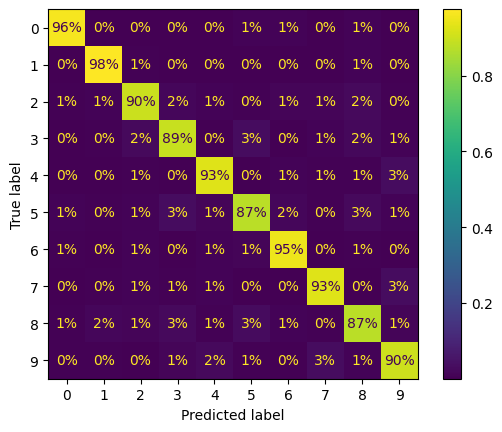

In [48]:
ConfusionMatrixDisplay.from_predictions(train_Y, predictions, normalize="true", values_format=".0%")

Observations:
* So the percent of predictions for `3`, `5` and `8` are significantly less than rest of the classes as expected
* Which is interesting because when it comes to hand written digits, `3`, `5` and `8` are similar and can be confusing depending on the handwriting.
* Lets focus more on errors by putting 0 weight on correct predictions

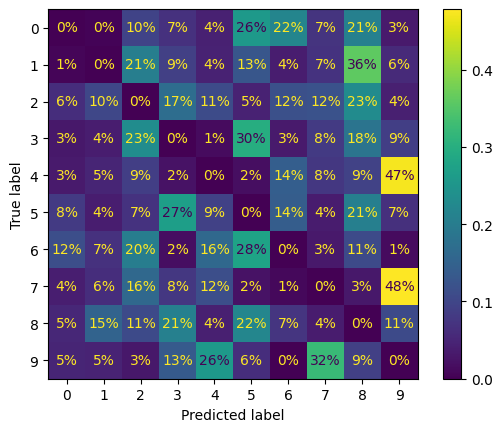

In [49]:
sample_weight = (predictions != train_Y)
ConfusionMatrixDisplay.from_predictions(train_Y, predictions, normalize="true", values_format=".0%", sample_weight=sample_weight)

Observations:
* This is interesting, this confusion matrix highlights some interesting chunks of errors,
  * `47%` of errors of 4 (False Negatives) and `48%` of errors of 7 were classified as 9. This kind of makes sense, cause when we write 4 or 7 its kind of similar to 9. The straight line of 7 or angle of 4 can be mis represented as curve of 9.
  * Also majoriy of misclassified 3s are classified as 2, 5 and 8.
  * Similarly majority of misclassified 5s are classified as 3 and 8 and majority of 8s are misclassified as 3 and 5.
  * This makes sense cause hand written 2,3,5 and 8 share similar patterns.

#### Threshold Tuning

* Lets see if we can find a better threshold and improve the results.

##### Per Class Threshold Calculation

In [50]:
from sklearn.metrics import roc_curve

def calculate_per_class_threshold(actual_classes, prediction_probabilities):
    thresholds = []
    for class_label in range(10):  # Loop through all classes
        # Convert actual_classes to binary labels for the current class
        binary_labels = (actual_classes == class_label).astype(int)
        # Extract probabilities for the current class
        class_probabilities = prediction_probabilities[:, class_label]

        # Calculate ROC curve
        fpr, tpr, threshold = roc_curve(binary_labels, class_probabilities)

        # Calculate F1 scores for each threshold
        f1_scores = (2 * tpr * (1 - fpr)) / (tpr + (1 - fpr))

        # Handle any division by zero or invalid values in F1 scores
        f1_scores = np.nan_to_num(f1_scores)

        # Find the threshold with the highest F1 score
        optimal_idx = f1_scores.argmax()
        optimal_threshold = threshold[optimal_idx]

        # Store the threshold for this class
        thresholds.append({ "class": class_label, "optimal_threshold" : optimal_threshold})

    return thresholds

In [51]:
# Assuming `train_Y` contains actual class labels and `probabilities` contains class probabilities
thresholds = calculate_per_class_threshold(train_Y, probabilities)
threshold_df = pd.DataFrame(thresholds)

##### Predictions With Thresholds

In [52]:
## helper functions to predict using optimized thresholds
def predict_with_thresholds(prediction_probabilities, thresholds):
    predictions = []
    for i in range(prediction_probabilities.shape[0]):  # Iterate over each sample
        # Check if probabilities exceed their respective thresholds
        class_probs = [(cls, prob) for cls, prob in enumerate(prediction_probabilities[i]) if prob >= thresholds[thresholds["class"] == cls]["optimal_threshold"].values[0]]

        if class_probs:
            # Choose the class with the highest probability among those exceeding thresholds
            predictions.append(max(class_probs, key=lambda x: x[1])[0])
        else:
            # If no class exceeds threshold, default to the one with the highest probability
            predictions.append(prediction_probabilities[i].argmax())

    return np.array(predictions)

In [53]:
optimized_predictions = predict_with_thresholds(probabilities, thresholds=threshold_df)

Observations:
* We did get threshold predictions, but it took almost 3mins to predict all the instances, not sure if we need to optimize this or not.
* Lets revisit `F1 Score`, `Per Class F1 Score` and `Confusion Matrix` and see if there are any improvements.

In [54]:
f1_score(train_Y, optimized_predictions, average="weighted")

0.9197076517400227

* Original `f1 score` was `0.9197076517400227` so no change there.

In [55]:
per_class_f1_scores_optimized = per_class_f1_score(train_Y, optimized_predictions)
pd.concat([pd.DataFrame(per_class_f1_scores_optimized), f1_scores_df], axis=1)

,class,f1_score,class,f1_score
0,0,0.960340,0,0.960340
1,1,0.964078,1,0.964078
2,2,0.903959,2,0.903959
3,3,0.897927,3,0.897927
4,4,0.927605,4,0.927605
5,5,0.880527,5,0.880527
6,6,0.944239,6,0.944239
7,7,0.929411,7,0.929411
8,8,0.881078,8,0.881078
9,9,0.898623,9,0.898623


Observations:
* So the values are exactly the same, I think its safe to conclude default threshold are already well optimized and we can move on to hyperparam tuning

## Hyperparameter Tuning

* For `Hyperparameter Tuning` we'll use the following strategy
  * Iteration 1 : First we'll experiment with different solvers [‘newton-cg’, ‘sag’, ‘saga’, ‘lbfgs’] and different transformation techniqune ['normalization', 'binarization']
  * Iteration 2 : Next along with above params we'll add penalty ['l2', 'None'] since `l2` works with all solvers we'll experiment with and without penalty, along with C [0.01, 0.1, 1, 10, 100]

### Iteration 1

Update:
* After running first iteration for more than an hour without ending, we've decided to reduce the solvers to 2 and see if we can train quicker.

In [56]:
param_grid = {
    "logisticregression__solver": ['saga', 'lbfgs'],
    "preprocessing__kw_args": [{"method": "normalize"}, {"method": "binarize"}],
}

## initialize LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000, verbose=1)

## create pipeline
pipeline = Pipeline([
    ("preprocessing", FunctionTransformer(preprocess_data, kw_args={"method": "normalize"})),
    ("logisticregression", logistic_regression)
])

In [57]:
# Grid search with your pipeline
## commenting these lines to avoid running fit again as it is time consuming.
## uncomment the below lines to fit model again.

# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="f1_weighted")
# grid_search.fit(train_X, train_Y)

convergence after 526 epochs took 778 seconds
convergence after 484 epochs took 714 seconds
convergence after 458 epochs took 676 seconds
convergence after 492 epochs took 731 seconds
convergence after 491 epochs took 726 seconds
convergence after 453 epochs took 672 seconds
convergence after 506 epochs took 1130 seconds


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        FunctionTransformer(func=<function preprocess_data at 0x7a7eb239fac0>,
                                                            kw_args={'method': 'normalize'})),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           verbose=1))]),
             param_grid={'logisticregression__solver': ['saga', 'lbfgs'],
                         'preprocessing__kw_args': [{'method': 'normalize'},
                                                    {'method': 'binarize'}]},
             scoring='f1_weighted')

### Finding Best Params

In [58]:
# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__solver': 'saga', 'preprocessing__kw_args': {'method': 'normalize'}}
Best F1 Score: 0.9199233261325376


### Saving Model to Google Drive

In [59]:
## dump the model to google drive
filename = joblib.dump(grid_search.best_estimator_, f"{shared_folder_path}/logistic_regression_best_model.joblib")

In [60]:
grid_search.cv_results_

{'mean_fit_time': array([723.87425955, 710.67603246,  50.02896428,  51.10670273]),
 'std_fit_time': array([41.64778826, 27.18477957,  4.67532955,  2.63000102]),
 'mean_score_time': array([0.35052745, 0.48517712, 0.32850695, 0.38030553]),
 'std_score_time': array([0.11373763, 0.06599439, 0.05804037, 0.01416114]),
 'param_logisticregression__solver': masked_array(data=['saga', 'saga', 'lbfgs', 'lbfgs'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_preprocessing__kw_args': masked_array(data=[{'method': 'normalize'}, {'method': 'binarize'},
                    {'method': 'normalize'}, {'method': 'binarize'}],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'logisticregression__solver': 'saga',
   'preprocessing__kw_args': {'method': 'normalize'}},
  {'logisticregression__solver': 'saga',
   'preprocessing__kw_args': {'method': 'binarize'}},
  {'logisticregressio

In [62]:
# Save cross-validation results as JSON
## commenting these lines to avoid overwriting the model in google drive.
## uncomment them to update the model in google drive.

# filename = joblib.dump(grid_search.cv_results_, f"{shared_folder_path}/logistic_regression_cv_results.joblib")

### Performance Metrics

* To calculate the performance metrics, we'll first get the best params from grid search and do cross val with the same params.

In [65]:
best_params = grid_search.best_params_

In [66]:
## create new pipeline
logistic_regression = LogisticRegression(max_iter=10000, verbose=1, solver=best_params.get("logisticregression__solver", "saga"))
## create pipeline
preprocessing_method = best_params.get("preprocessing__kw_args", {"method": "normalize"})["method"]

pipeline = Pipeline([
    ("preprocessing", FunctionTransformer(preprocess_data, kw_args={"method": preprocessing_method})),
    ("training", logistic_regression)
])

In [67]:
probabilities = cross_val_predict(pipeline, train_X, train_Y, cv=3, method="predict_proba")

convergence after 528 epochs took 809 seconds
convergence after 482 epochs took 718 seconds
convergence after 458 epochs took 706 seconds


In [68]:
comparison_df

,Algorithm,Method,Accuracy,Weighted F1 Score,ROC AUC Score,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,Logistic Regression,Default Estimator,0.919857,0.919708,0.992884,0.96034,0.964078,0.903959,0.897927,0.927605,0.880527,0.944239,0.929411,0.881078,0.898623


In [70]:
comparison_df = update_model_comparison(probabilities, train_Y, "Logistic Regression", "GridSearchCV", comparison_df)

In [78]:
comparison_df

,Algorithm,Method,Accuracy,Weighted F1 Score,ROC AUC Score,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,Logistic Regression,Default Estimator,0.919857,0.919708,0.992884,0.960340,0.964078,0.903959,0.897927,0.927605,0.880527,0.944239,0.929411,0.881078,0.898623
1,Logistic Regression,GridSearchCV,0.920071,0.919924,0.992903,0.960607,0.964322,0.904208,0.898171,0.927186,0.880879,0.944449,0.929889,0.882190,0.898043


Observations:
* We see slight improvement in hyper tuned model, but nothing significant. Lets try second iteration of GridSearchCV while keeping `solver` and `arguments` as it is and finding best penalty and C value.
* I think instead of using GridSearchCV we should do RandomGridSearch which might be faster and better.

### Iteration 2

In [88]:
# Create logistic regression with a fixed solver
logistic_regression = LogisticRegression(
    max_iter=10000,
    verbose=1,
    solver="saga"
)

# Define the pipeline
pipeline = Pipeline([
    ("preprocessing", FunctionTransformer(preprocess_data, kw_args={"method": "normalize"})),
    ("logisticregression", logistic_regression)
])

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    "logisticregression__penalty": ["l2", None],  # Experiment with or without penalty
    "logisticregression__C": loguniform(0.001, 100)  # Explore a wide range of C values
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Number of random samples
    cv=3,  # 3-fold cross-validation
    scoring="f1_weighted",  # Optimize for F1 weighted score
    verbose=1,  # Print progress
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available processors
)


In [1]:
random_search.fit(train_X,train_Y)

NameError: name 'random_search' is not defined